Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Andrea Minano"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [2]:
### 1. Run descriptive commands to better understand the train.csv dataset

import pandas as pd # Import Pandas
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("train.csv") # Import train.csv file as Data Frame 'DF'
df_original = df.copy() # Create a copy of 'DF'
print(df.shape) # Check the shape of the dataframe. Results showed 891 rows, 12 columns 
df 
df.info() # Check non-null values - 714 non-null for "Age", 204 non-null for "Cabin", 889 non-null for "Embarked"
df.isnull().sum() # Count the number of Null values - 177 Null for "Age", 687 Null for "Cabin", 2 Null for "Embarked"
df.columns # Check names of columns in the Data Frame


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
### 2. Extract the Survivors from the total dataset

df_select = df[(df['Survived']==1)] # Create a Data Frame of only those who survived the Titanic 

df_select

# 342 passengers survived the Titanic of 891 in this dataset - however, I'm assuming this dataset is a SAMPLE of the actual passenger list aboard the Titanic which had over 2,000 passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
### 3. Compare how many male and female passengers there were in the original list of 891 passengers vs. the surviving list of passengers of 342

df["Sex"].value_counts() # Count the number of female and male passengers from the entire list of passangers

Sex
male      577
female    314
Name: count, dtype: int64

In [5]:
df_select["Sex"].value_counts() # Count the number of female and male passengers from the surviving list of passangers

# From this section, I conclude that women were more likely to survive the Titanic

Sex
female    233
male      109
Name: count, dtype: int64

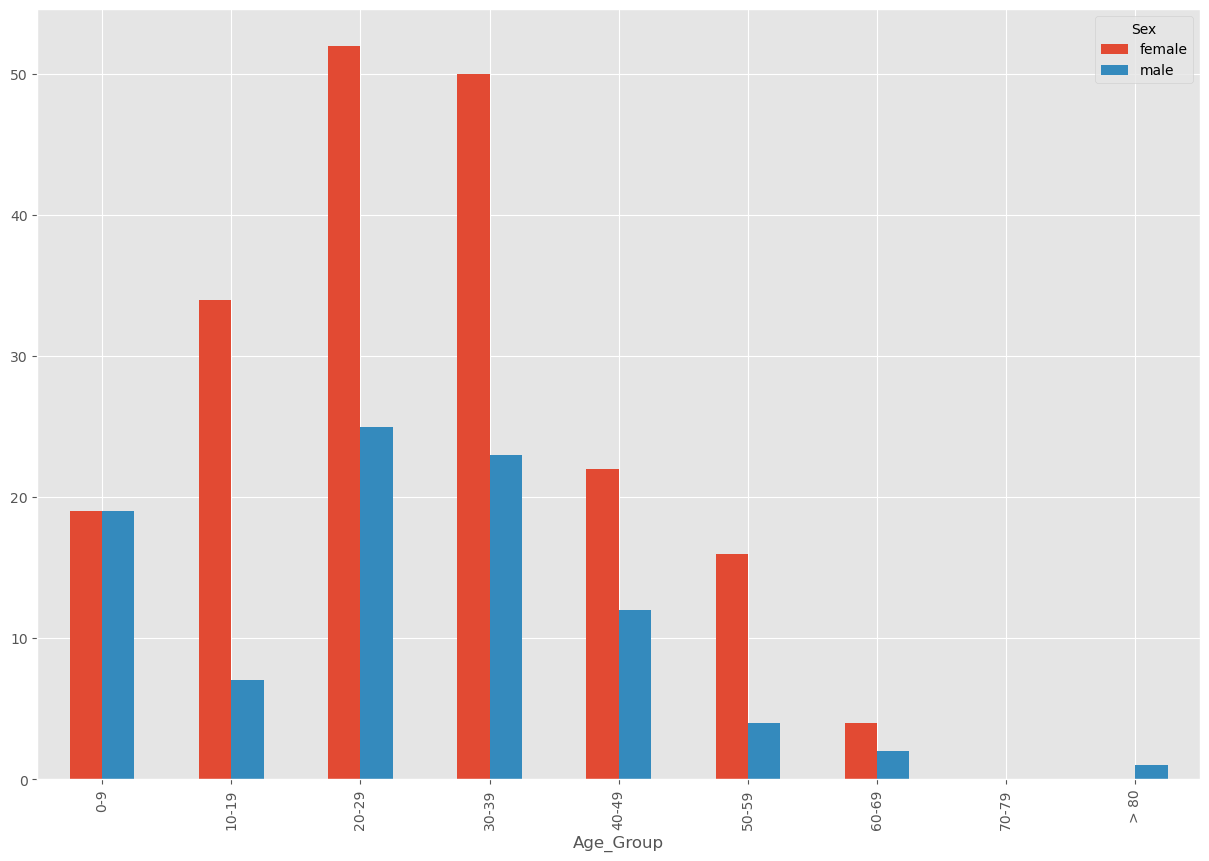

In [6]:
### 4. Group passengers by age groups to assess the differences in age groups between surviving passengers and the original list of passengers
# Important: This analysis ignores the 177 records in the CSV with missing values in "Age" column
# Therefore, the total number of passengers with Non-Null values in "Age" column is 714

df["Age"].describe() # Get statistics of "Age" column to understand max and min values
df_select["Age"].isnull().sum() # Get sum of Is Null values in "Age" column for only the Survivors - 52 Survivors have Null "Age" values; therefore, 290 have Non-Null values

bins = [0,10,20,30,40,50,60,70,80,90] # Create bins for Age Groups
bin_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '> 80'] # Create labels for Age Groups
df["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels) # Create new column "Age Group" in original Data Frame

df["Age_Group"].value_counts() # Get counts of passengers by "Age Group"

# Identify how many survivors were Female or Male grouped by their Age Group
Gender_Analysis = pd.crosstab(index=df["Age_Group"], columns=df["Sex"], values=df["Survived"], aggfunc="sum")
Gender_Analysis
Gender_Analysis.plot(kind='bar', figsize=(15,10));

# From this section, I conclude that those who survived the Titanic were most likely to be between 20 and 39 years old (150 passengers in this group, or 52% of 290 Survivors with Non-Null values in "Age" column).
# Females in this Age Group were more likely to survive than Males

# Additional notes: For visually comparing with the Age distribution of all original passengers
#Gender_Analysis_All = pd.crosstab(index=df["Age_Group"], columns=df["Sex"], values=df["PassengerId"], aggfunc="count")
#Gender_Analysis_All
#Gender_Analysis_All.plot(kind='bar', figsize=(15,10));


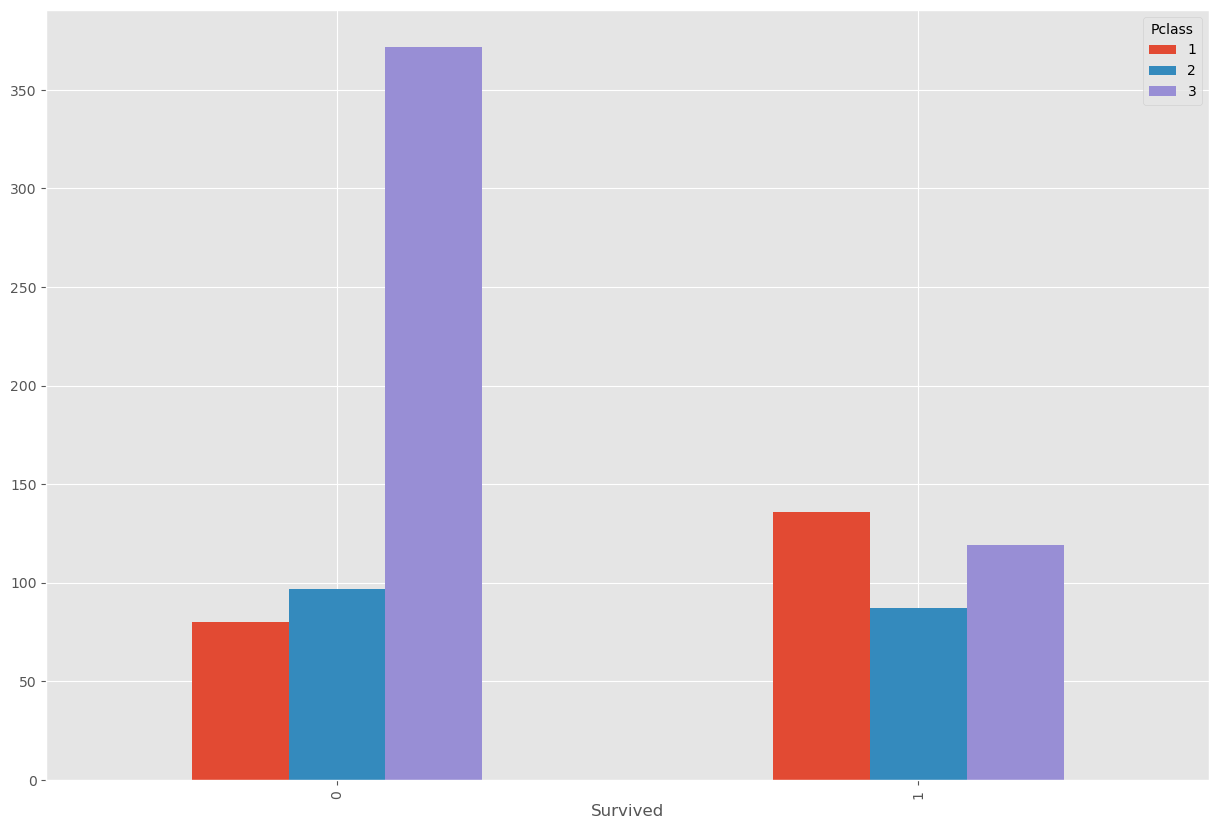

In [7]:
### 5. Analyze the passengers by the Ticket Class

df_select["Pclass"].value_counts() # Count all surviving passengers by ticket class

df["Pclass"].value_counts() # Count all original passengers by ticket class

Level_Analysis = pd.crosstab(df['Survived'], df['Pclass'], df['PassengerId'], aggfunc='count')
Level_Analysis.plot(kind='bar', figsize=(15,10));

# From this section, I conclude that those who were most likely to survive were in First Class. 

# Most passengers who perished in the Titanic were in Third Class.

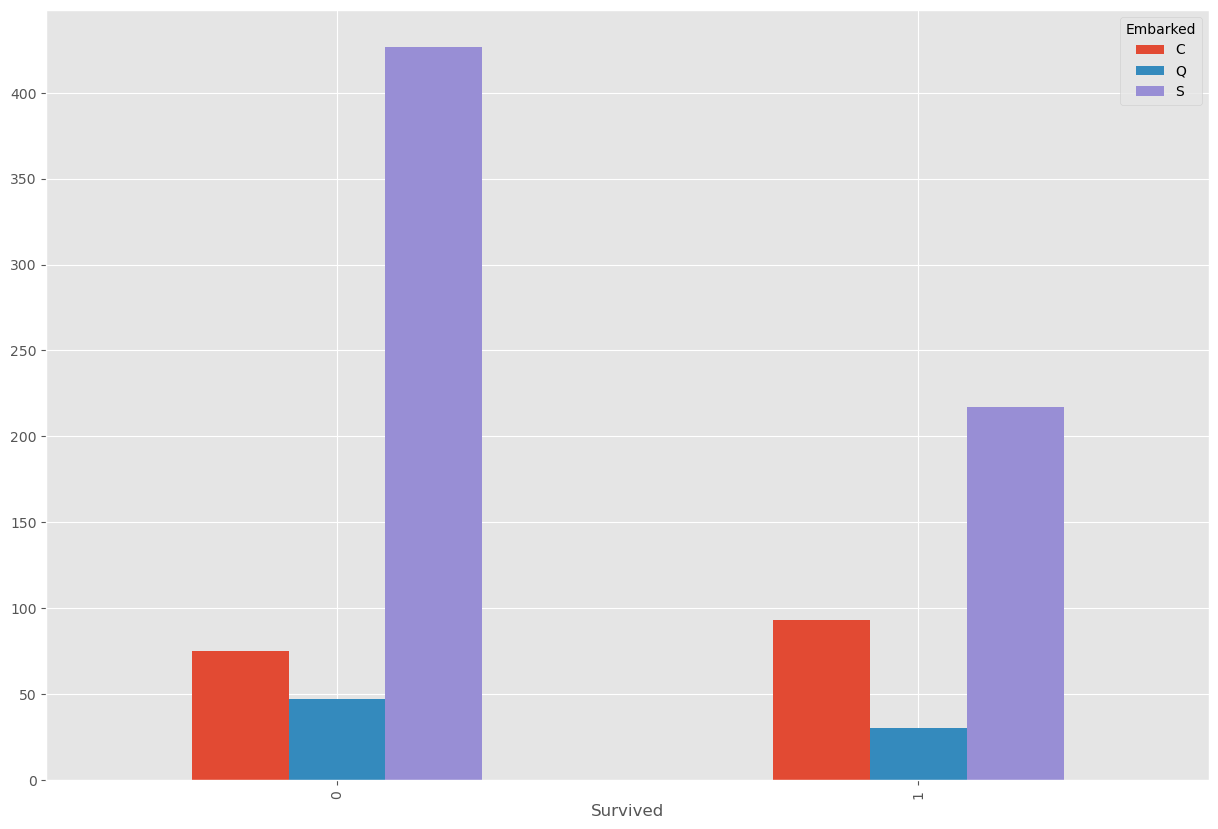

In [8]:
### 6. Analyze where surviving passengers Embarked from

df_select["Embarked"].value_counts() # Count the number of surviving passengers and where they Embarked from

# Count the number of surviving and perished passangers by their Embarkment point (C = Cherbourg, Q = Queenstown, S = Southampton)
Level_Analysis_2 = pd.crosstab(df['Survived'], df['Embarked'], df['PassengerId'], aggfunc='count')
Level_Analysis_2.plot(kind='bar', figsize=(15,10));

# From this section, I conclude that passengers who survived were most likely to have embarked in Southampton

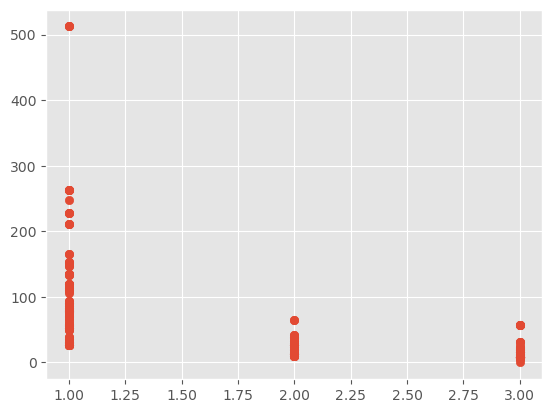

In [9]:
### 7. Create a Scatterplot of Fares paid by surviving passengers

plt.scatter(df_select['Pclass'],df_select['Fare'])

Conclusions

***********Question 1. (4 points) ***********

The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? (2 points)
The detailed explanation of the logic of the analysis (2 points)

Answer: As seen in logic and steps above, those who were found to be most likely to survive the Titanic were Female, between the ages of 20 and 39 years old.
Passengers in First Class and those who embarked from Southampton were also among those most likely to survive.

 ***********Question 2. (3 points)***********

What other attributes did you use for the analysis? Explain how you used them and why you decided to use them.
Provide a complete list of all attributes used.

Answer: I used Survival, Age, Ticket class, Sex, Fare and Embarkment as the main attributes for analysis. Survival was helpful as a flag to identify which passengers survived or not. Age and Sex served to group survivors and identify any trends relative to the original passenger list. The same for Ticket class as this could show if socio-economic factors played a role in who survived and who did not. Fare can be used to show the distribution for how much surving passengers paid for their tickets, showing that a small group of survivors paid more than £500 for their Titanic ticket (roughly £70,000+ today*). Finally, Embarkment was only used as an additional descriptive factor as an optional add-on to the analysis.

*Source: https://www.in2013dollars.com/uk/inflation/1912?amount=500

***********Question 3. (3 points)***********

Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

Answer: I engineered the "Age Group" attribute to group passengers and ease analysis and derive conclusions. For example, to show a histogram of survivors by Age Group.
I believe that with the attributes I used, I captured the main factors to derive data-driven conclusions. 

***********Question 4. (5 points)***********

How did you treat missing values for those attributes that you included in the analysis (for example, age attribute)? Provide a detailed explanation in the comments.

Answer: For my analysis, I ignored the missing values in the Age attribute as most of the dataset included an Age variable. Ignoring these missing values appears to not bias my conclusions.